In [12]:
import numpy as np
import torch
import torch.nn.functional as f
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim 

In [13]:
transform = transforms.ToTensor()
trainset = datasets.MNIST('./MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valset = datasets.MNIST('./MNIST_data', download=True, train=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

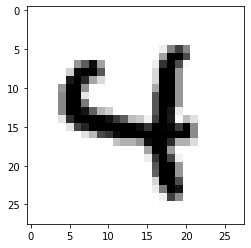

In [14]:
dataiter = iter(trainloader)
imagens, etiquetas = dataiter.next()
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [15]:
print(imagens[0].shape) #OBS.: verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) #OBS.: verificar as dimensões do tenso de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [16]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo,self).__init__()
    self.linear1 = nn.Linear(28*28, 128)
    self.linear2 = nn.Linear(128, 64)
    self.linear3 = nn.Linear(64, 10)

  def forward(self,X):
    X = F.relu(self.linear1(X))
    X = F.relu(self.linear2(X))
    X = self.linear1(X)
    return F.log_softmax(X, dim=1)

In [17]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
  inicio = time()
  criterio = nn.NLLLoss()
  EPOCHS = 10
  modelo.train()

  for epoch in range(EPOCHS):
    perda_acumulada = 0
    for imagens, etiquetas in trainloader:
      imagens = imagens.view(imagens,shape[0], -1)
      otimizador.zero_grad()

      output = modelo(imagens.to(device))
      perda_instantanea = criterio(output, etiquetas.to(device))

      perda_instantanea.backward()

      otimizador.step()

      perda_acumulada += perda_instantanea.item()

    else:
      print("EPOCH {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
  print("\nTempo de treino (em minutos)=",(time()-inicio)/60)

In [18]:
def validacao(modelo, validador, device):
    conta_corretas, conta_todas = 0, 0
    for imagens,etiquetas in valloader:
      for i in range(len(etiquetas)):
        img = imagens[i].view(1, 784)
        with torch.no_grad():
          logps = modelo(img.to(device))

          ps = torch.exp(logps)
          probab = list(ps.cpu().numpy()[0])
          etiqueta_pred = probab.index(max(probab))
          etiqueta_certa = etiquetas.numpy()[i]
          if(etiqueta_certa == etiqueta_pred):
            conta_corretas +=1
          conta_todas +=1

      print("Total de imagens testadas=", conta_todas)
      print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))


In [19]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)